# Data Statistic Visualization


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# ---- PATH ----
train_path = r"D:\NLP\QA_NLP\qa_splits_fixed\train.jsonl"
val_path   = r"D:\NLP\QA_NLP\qa_splits_fixed\val.jsonl"
test_path  = r"D:\NLP\QA_NLP\qa_splits_fixed\test.jsonl"

def load_jsonl(path):
    rows = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            if line.strip():
                rows.append(json.loads(line))
    return pd.DataFrame(rows)

train_df = load_jsonl(train_path)
val_df   = load_jsonl(val_path)
test_df  = load_jsonl(test_path)

train_df.head(), train_df.shape, val_df.shape, test_df.shape


(                                             context  \
 0  The Lair là một bộ phim truyền hình về ma cà r...   
 1  VOS 3.0 (Android 10) Ra mắt với người dùng ngà...   
 2  Trống cái là các loại trống lớn, đường kính từ...   
 3  Đó là các chương trình thương mại tích cực đối...   
 4  Cô cố của hoàng đế cũng được phong làm "Đại tr...   
 
                                             question  \
 0  Phần đầu tiên của The Lair bao gồm bao nhiêu tập?   
 1  Kể tên một số tính năng đặc biệt của VOS 3.0 đ...   
 2    Trống cái có đường kính tối thiểu là bao nhiêu?   
 3  Chương trình thương mại lượng khí nhà kính lớn...   
 4  Ai được phong làm "Đại trưởng Đế Cơ" theo đoạn...   
 
                                               answer  
 0        Phần đầu tiên của The Lair bao gồm sáu tập.  
 1  Những tính năng đặc biệt của VOS 3.0 được ngườ...  
 2                                               50cm  
 3  Chương trình thương mại lượng khí nhà kính lớn...  
 4  Cô cố của hoàng đế được phon

In [ ]:
train_df.isnull().sum()


context     0
question    0
answer      0
dtype: int64

In [ ]:
import numpy as np

train_df["q_len"] = train_df["question"].str.len()
train_df["a_len"] = train_df["answer"].str.len()

print("📌 Average question length:", train_df["q_len"].mean())
print("📌 Average answer length:", train_df["a_len"].mean())
print("📌 Max question length:", train_df["q_len"].max())
print("📌 Max answer length:", train_df["a_len"].max())


📌 Average question length: 61.88673760961671
📌 Average answer length: 61.73297861858311
📌 Max question length: 192
📌 Max answer length: 556


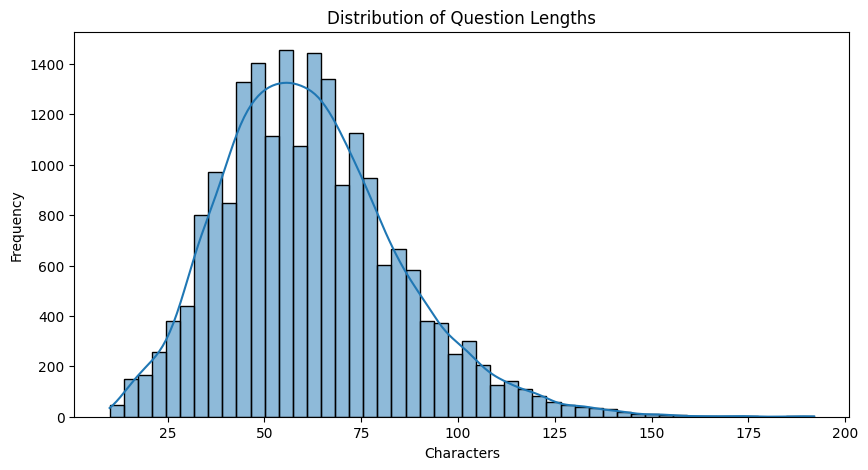

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(train_df["q_len"], bins=50, kde=True)
plt.title("Distribution of Question Lengths")
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.show()


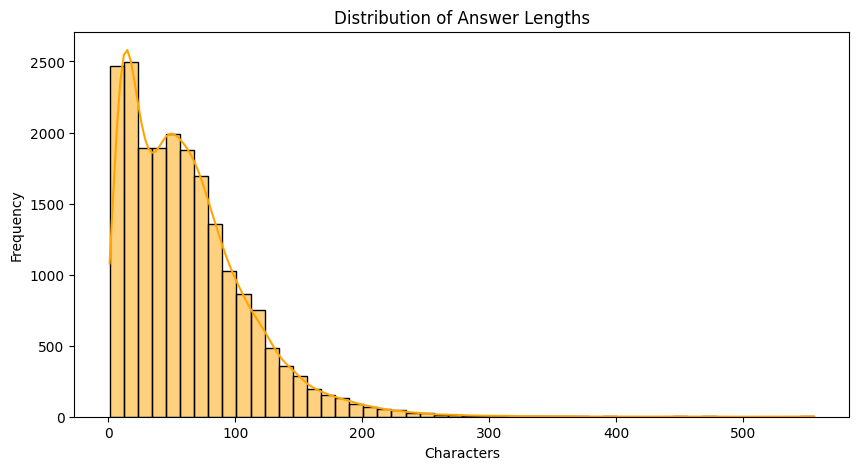

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(train_df["a_len"], bins=50, kde=True, color="orange")
plt.title("Distribution of Answer Lengths")
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.show()


In [ ]:
def stats(df, name):
    return {
        "split": name,
        "samples": len(df),
        "avg_q_len": df["question"].str.len().mean(),
        "avg_a_len": df["answer"].str.len().mean(),
        "uniq_q": len(df["question"].unique()),
        "uniq_a": len(df["answer"].unique()),
    }

pd.DataFrame([
    stats(train_df,"train"),
    stats(val_df,"val"),
    stats(test_df,"test")
])


,split,samples,avg_q_len,avg_a_len,uniq_q,uniq_a
0,train,20298,61.886738,61.732979,20238,19831
1,val,2256,61.283245,59.651152,2255,2244
2,test,2507,61.609892,61.583566,2507,2494


In [ ]:
q_dup = train_df["question"].duplicated().sum()
a_dup = train_df["answer"].duplicated().sum()

print("🔥 Số câu hỏi trùng:", q_dup)
print("🔥 Số câu trả lời trùng:", a_dup)


🔥 Số câu hỏi trùng: 60
🔥 Số câu trả lời trùng: 467


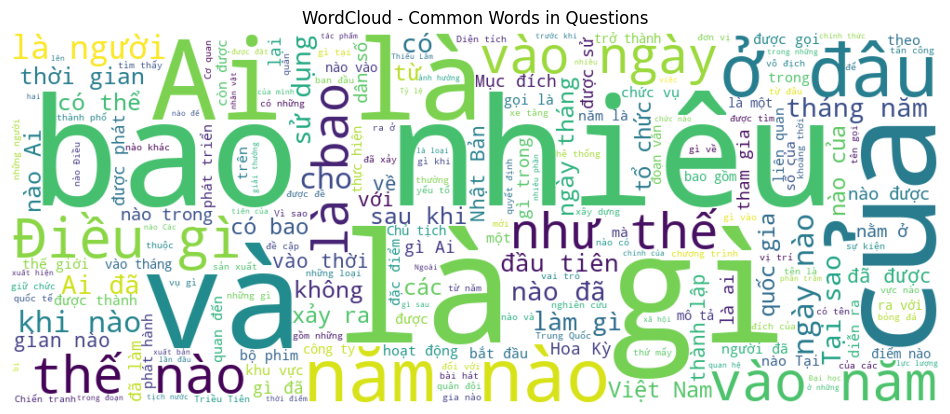

In [ ]:
from wordcloud import WordCloud

text_all = " ".join(train_df["question"].tolist())

plt.figure(figsize=(12,6))
wc = WordCloud(width=1000, height=400, background_color="white").generate(text_all)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Common Words in Questions")
plt.show()


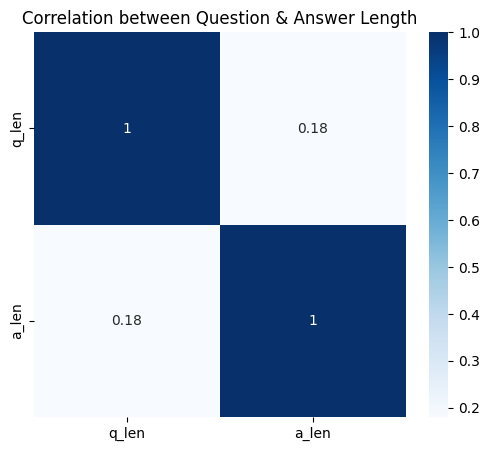

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(train_df[["q_len","a_len"]].corr(), annot=True, cmap="Blues")
plt.title("Correlation between Question & Answer Length")
plt.show()


# Check data after synthetic data


In [ ]:
import json
import re
import pandas as pd

# ==========================
# LOAD JSONL DATA
# ==========================
path = "D:\\NLP\\QA_NLP\\data\\train_full.jsonl"
data = []
with open(path, "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if line:
            data.append(json.loads(line))

df = pd.DataFrame(data)
print("📌 Tổng số QA:", len(df))


# ==========================
# 1. CHECK MISSING FIELDS
# ==========================
missing = df[df["question"].isna() | df["answer"].isna() | df["context"].isna()]


# ==========================
# 2. CHECK EMPTY STRINGS
# ==========================
empty = df[(df["question"].str.strip() == "") | (df["answer"].str.strip() == "")]


# ==========================
# 3. BAD QUESTIONS (tham chiếu văn bản)
# ==========================
bad_question = df[df["question"].str.contains(
    r"trong đoạn|theo đoạn|theo văn bản|trong văn bản|đoạn văn trên|dựa vào đoạn",
    case=False,
    regex=True
)]


# ==========================
# 4. ANSWERS TOO LONG
# ==========================
too_long = df[df["answer"].str.len() > 600]


# ==========================
# 5. ANSWERS MEANINGLESS
# ==========================
bad_answer = df[df["answer"].str.contains(
    r"không rõ|không có thông tin|không đề cập|không nêu|không biết",
    case=False
)]


# ==========================
# 6. DUPLICATES
# ==========================
dup_question = df[df.duplicated("question", keep=False)]
dup_answer   = df[df.duplicated("answer", keep=False)]
dup_pair     = df[df.duplicated(subset=["context", "question"], keep=False)]


# ==========================
# 7. CHECK ANSWER–CONTEXT CONSISTENCY (simple lexical matching)
# ==========================
def contains_any_word(answer, context):
    words = re.findall(r"\w+", answer.lower())
    target = context.lower()
    # nếu answer ngắn, bỏ qua kiểm tra
    if len(words) < 3:
        return True
    return any(w in target for w in words[:5])  # kiểm 5 từ đầu tiên

fails = []
for idx, row in df.iterrows():
    if not contains_any_word(row["answer"], row["context"]):
        fails.append(idx)


# ==========================
# SUMMARY REPORT
# ==========================
print("\n===== 📊 KẾT QUẢ KIỂM TRA DỮ LIỆU QA (JSONL) =====")

print(f"• Tổng QA: {len(df)}")
print(f"• Thiếu trường (missing fields): {len(missing)}")
print(f"• Chuỗi rỗng (empty question/answer): {len(empty)}")
print(f"• Câu hỏi kém (tham chiếu văn bản): {len(bad_question)}")
print(f"• Câu trả lời quá dài (>600 ký tự): {len(too_long)}")
print(f"• Câu trả lời vô nghĩa: {len(bad_answer)}")
print(f"• Trùng câu hỏi: {len(dup_question)}")
print(f"• Trùng câu trả lời: {len(dup_answer)}")
print(f"• Trùng context–question pair: {len(dup_pair)}")
print(f"• Trả lời có khả năng KHÔNG KHỚP context: {len(fails)}")

print("\n===== 🔍 Ví dụ dòng lỗi (nếu có) =====")
print("Thiếu trường:\n", missing.head(), "\n")
print("Câu hỏi xấu:\n", bad_question.head(), "\n")
print("Câu trả lời vô nghĩa:\n", bad_answer.head(), "\n")
print("Trùng context–question:\n", dup_pair.head(), "\n")
print("Answer không khớp context:\n", df.iloc[fails].head())


📌 Tổng số QA: 38167

===== 📊 KẾT QUẢ KIỂM TRA DỮ LIỆU QA (JSONL) =====
• Tổng QA: 38167
• Thiếu trường (missing fields): 0
• Chuỗi rỗng (empty question/answer): 0
• Câu hỏi kém (tham chiếu văn bản): 172
• Câu trả lời quá dài (>600 ký tự): 0
• Câu trả lời vô nghĩa: 38
• Trùng câu hỏi: 1527
• Trùng câu trả lời: 6682
• Trùng context–question pair: 1390
• Trả lời có khả năng KHÔNG KHỚP context: 150

===== 🔍 Ví dụ dòng lỗi (nếu có) =====
Thiếu trường:
 Empty DataFrame
Columns: [context, question, answer]
Index: [] 

Câu hỏi xấu:
                                                context  \
4    Cô cố của hoàng đế cũng được phong làm "Đại tr...   
71   Vinh quang vĩnh cửu dành cho Quân đội Xô Viết ...   
116  Farah, Paolo (tháng 8 năm 2006). "Five Years o...   
182  Trời sinh ba chữ "Vũ Cát Tường". Những đoạn nh...   
492  Năm trước đây, thần (Thoại Ngọc Hầu) phụng mạn...   

                                              question  \
4    Ai được phong làm "Đại trưởng Đế Cơ" theo đoạn...   
71  

In [ ]:
import json
import re
import pandas as pd

# ==========================
# LOAD JSONL DATA
# ==========================
input_path = "D:\\NLP\\QA_NLP\\data\\train_full.jsonl"
output_path = "D:\\NLP\\QA_NLP\\data\\train_clean.jsonl"

rows = []
with open(input_path, "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if line:
            rows.append(json.loads(line))

df = pd.DataFrame(rows)
print("📌 Tổng số QA ban đầu:", len(df))


# ============================================================
# 1️⃣  LOẠI BỎ CÂU HỎI KÉM: "trong đoạn văn", "được đề cập", ...
# ============================================================
PATTERN_BAD_QUESTION = r"trong đoạn|theo đoạn|theo văn bản|trong văn bản|đoạn văn trên|dựa vào đoạn"

before = len(df)
df = df[~df["question"].str.contains(PATTERN_BAD_QUESTION, case=False, regex=True)]
print(f"✔ Loại câu hỏi kém: {before - len(df)}")


# ============================================================
# 2️⃣  LOẠI BỎ CÂU TRẢ LỜI VÔ NGHĨA
# ============================================================
PATTERN_BAD_ANSWER = r"không rõ|không có thông tin|không đề cập|không nêu|không biết"

before = len(df)
df = df[~df["answer"].str.contains(PATTERN_BAD_ANSWER, case=False, regex=True)]
print(f"✔ Loại câu trả lời vô nghĩa: {before - len(df)}")


# ============================================================
# 3️⃣  LOẠI DUPLICATE (context + question)
# ============================================================
before = len(df)
df = df.drop_duplicates(subset=["context", "question"], keep="first")
print(f"✔ Loại duplicate (context–question): {before - len(df)}")


# ============================================================
# 4️⃣  LOẠI DUPLICATE QUESTION
# ============================================================
before = len(df)
df = df.drop_duplicates(subset=["question"], keep="first")
print(f"✔ Loại duplicate question: {before - len(df)}")


# ============================================================
# 5️⃣  LOẠI CÁC ANSWER KHÔNG KHỚP CONTEXT (LEXICAL CHECK)
# ============================================================
def answer_match_context(answer, context):
    words = re.findall(r"\w+", answer.lower())
    target = context.lower()
    if len(words) < 3:
        return True
    return any(w in target for w in words[:5])

bad_idx = []
for idx, row in df.iterrows():
    if not answer_match_context(row["answer"], row["context"]):
        bad_idx.append(idx)

df = df.drop(bad_idx)
print(f"✔ Loại các answer mismatch: {len(bad_idx)}")


# ============================================================
# 6️⃣  GHI FILE JSONL MỚI (train_clean.jsonl)
# ============================================================
# ==========================
# 6️⃣  GHI FILE JSONL MỚI
# ==========================
with open(output_path, "w", encoding="utf-8") as f:
    for _, row in df.iterrows():
        f.write(json.dumps(row.to_dict(), ensure_ascii=False) + "\n")

print("\n🎉 Cleaning hoàn tất!")
print("📌 Số QA sau khi làm sạch:", len(df))
print("📂 File đã lưu:", output_path)


📌 Tổng số QA ban đầu: 38167
✔ Loại câu hỏi kém: 172
✔ Loại câu trả lời vô nghĩa: 38
✔ Loại duplicate (context–question): 710
✔ Loại duplicate question: 73
✔ Loại các answer mismatch: 139

🎉 Cleaning hoàn tất!
📌 Số QA sau khi làm sạch: 37035
📂 File đã lưu: D:\NLP\QA_NLP\data\train_clean.jsonl


In [ ]:
import json
import re
import pandas as pd

# ==========================
# LOAD JSONL DATA
# ==========================
path = "D:\\NLP\\QA_NLP\\data\\train_clean.jsonl"
data = []
with open(path, "r", encoding="utf-8") as f:
    for line in f:
        line = line.strip()
        if line:
            data.append(json.loads(line))

df = pd.DataFrame(data)
print("📌 Tổng số QA:", len(df))


# ==========================
# 1. CHECK MISSING FIELDS
# ==========================
missing = df[df["question"].isna() | df["answer"].isna() | df["context"].isna()]


# ==========================
# 2. CHECK EMPTY STRINGS
# ==========================
empty = df[(df["question"].str.strip() == "") | (df["answer"].str.strip() == "")]


# ==========================
# 3. BAD QUESTIONS (tham chiếu văn bản)
# ==========================
bad_question = df[df["question"].str.contains(
    r"trong đoạn|theo đoạn|theo văn bản|trong văn bản|đoạn văn trên|dựa vào đoạn",
    case=False,
    regex=True
)]


# ==========================
# 4. ANSWERS TOO LONG
# ==========================
too_long = df[df["answer"].str.len() > 600]


# ==========================
# 5. ANSWERS MEANINGLESS
# ==========================
bad_answer = df[df["answer"].str.contains(
    r"không rõ|không có thông tin|không đề cập|không nêu|không biết",
    case=False
)]


# ==========================
# 6. DUPLICATES
# ==========================
dup_question = df[df.duplicated("question", keep=False)]
dup_answer   = df[df.duplicated("answer", keep=False)]
dup_pair     = df[df.duplicated(subset=["context", "question"], keep=False)]


# ==========================
# 7. CHECK ANSWER–CONTEXT CONSISTENCY (simple lexical matching)
# ==========================
def contains_any_word(answer, context):
    words = re.findall(r"\w+", answer.lower())
    target = context.lower()
    # nếu answer ngắn, bỏ qua kiểm tra
    if len(words) < 3:
        return True
    return any(w in target for w in words[:5])  # kiểm 5 từ đầu tiên

fails = []
for idx, row in df.iterrows():
    if not contains_any_word(row["answer"], row["context"]):
        fails.append(idx)


# ==========================
# SUMMARY REPORT
# ==========================
print("\n===== 📊 KẾT QUẢ KIỂM TRA DỮ LIỆU QA (JSONL) =====")

print(f"• Tổng QA: {len(df)}")
print(f"• Thiếu trường (missing fields): {len(missing)}")
print(f"• Chuỗi rỗng (empty question/answer): {len(empty)}")
print(f"• Câu hỏi kém (tham chiếu văn bản): {len(bad_question)}")
print(f"• Câu trả lời quá dài (>600 ký tự): {len(too_long)}")
print(f"• Câu trả lời vô nghĩa: {len(bad_answer)}")
print(f"• Trùng câu hỏi: {len(dup_question)}")
print(f"• Trùng câu trả lời: {len(dup_answer)}")
print(f"• Trùng context–question pair: {len(dup_pair)}")
print(f"• Trả lời có khả năng KHÔNG KHỚP context: {len(fails)}")

print("\n===== 🔍 Ví dụ dòng lỗi (nếu có) =====")
print("Thiếu trường:\n", missing.head(), "\n")
print("Câu hỏi xấu:\n", bad_question.head(), "\n")
print("Câu trả lời vô nghĩa:\n", bad_answer.head(), "\n")
print("Trùng context–question:\n", dup_pair.head(), "\n")
print("Answer không khớp context:\n", df.iloc[fails].head())


📌 Tổng số QA: 37035

===== 📊 KẾT QUẢ KIỂM TRA DỮ LIỆU QA (JSONL) =====
• Tổng QA: 37035
• Thiếu trường (missing fields): 0
• Chuỗi rỗng (empty question/answer): 0
• Câu hỏi kém (tham chiếu văn bản): 0
• Câu trả lời quá dài (>600 ký tự): 0
• Câu trả lời vô nghĩa: 0
• Trùng câu hỏi: 0
• Trùng câu trả lời: 5863
• Trùng context–question pair: 0
• Trả lời có khả năng KHÔNG KHỚP context: 0

===== 🔍 Ví dụ dòng lỗi (nếu có) =====
Thiếu trường:
 Empty DataFrame
Columns: [context, question, answer]
Index: [] 

Câu hỏi xấu:
 Empty DataFrame
Columns: [context, question, answer]
Index: [] 

Câu trả lời vô nghĩa:
 Empty DataFrame
Columns: [context, question, answer]
Index: [] 

Trùng context–question:
 Empty DataFrame
Columns: [context, question, answer]
Index: [] 

Answer không khớp context:
 Empty DataFrame
Columns: [context, question, answer]
Index: []
